<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

import warnings 

warnings.filterwarnings('ignore') # Cuidado que alguns warnings podem ser importantes 

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [27]:
dados=pd.read_csv('dados/HousePrices_HalfMil.csv',sep=';')

## Visualizar os dados

In [28]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [29]:
dados.shape[0]

1000

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [30]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [31]:
dados.corr().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.00,0.12,0.10,0.12,0.11,0.43,0.63
area,0.12,1.00,-0.01,-0.01,0.01,-0.02,-0.02
garagem,0.10,-0.01,1.00,0.07,0.06,-0.02,-0.02
banheiros,0.12,-0.01,0.07,1.00,0.05,-0.03,-0.02
lareira,0.11,0.01,0.06,0.05,1.00,0.03,-0.00
marmore,0.43,-0.02,-0.02,-0.03,0.03,1.00,-0.01
andares,0.63,-0.02,-0.02,-0.02,-0.00,-0.01,1.00


As mais correlacionadas em ordem decrescente são:

1º) Andares 

2º) Marmore

3º) Banheiros e Área (empate)

4º) Lareia

5º) Garagem

Todas elas possuem correlação positiva e não se observou correlação forte entre elas 

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [32]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [48]:
sns.set_palette("twilight_r")

sns.set_style('darkgrid')

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Distribuição Preços de Imóveis'}, ylabel='Reais'>

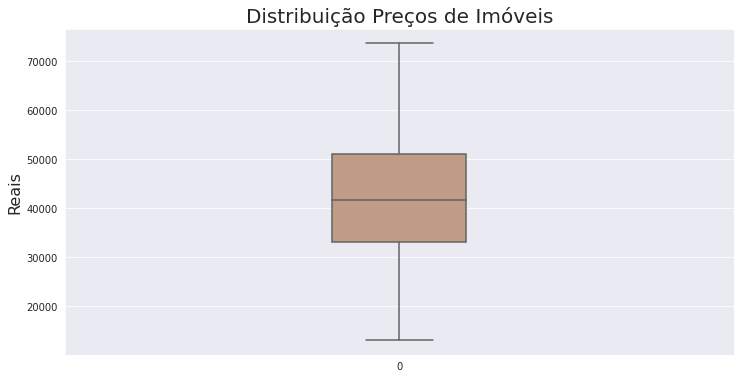

In [49]:
ax = sns.boxplot(data=dados.precos,orient='v',width=0.2)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição Preços de Imóveis',fontsize=20)
ax.set_ylabel('Reais',fontsize=16)
ax

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

Text(0.5, 0, 'Nº de vagas')

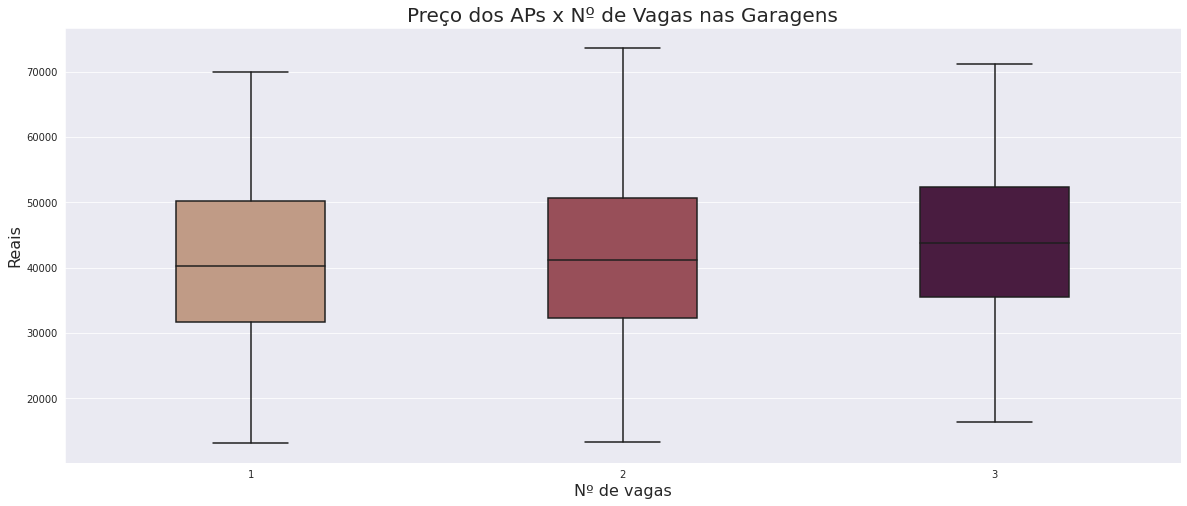

In [59]:
ax=sns.boxplot(x='garagem',y='precos',data=dados,orient='v',width=0.4)

ax.figure.set_size_inches(20,8)
ax.set_title('Preço dos APs x Nº de Vagas nas Garagens',fontsize=20)
ax.set_ylabel('Reais',fontsize=16)
ax.set_xlabel('Nº de vagas',fontsize=16)

Pelo boxplot não podemos ver uma grande diferença de preço entre os apartementos com 1,2 ou 3 garagens, logo a correlação é dita ser fraca!

### Box-plot (Preço X Banheiros)

Text(0.5, 0, 'Nº de banheiros')

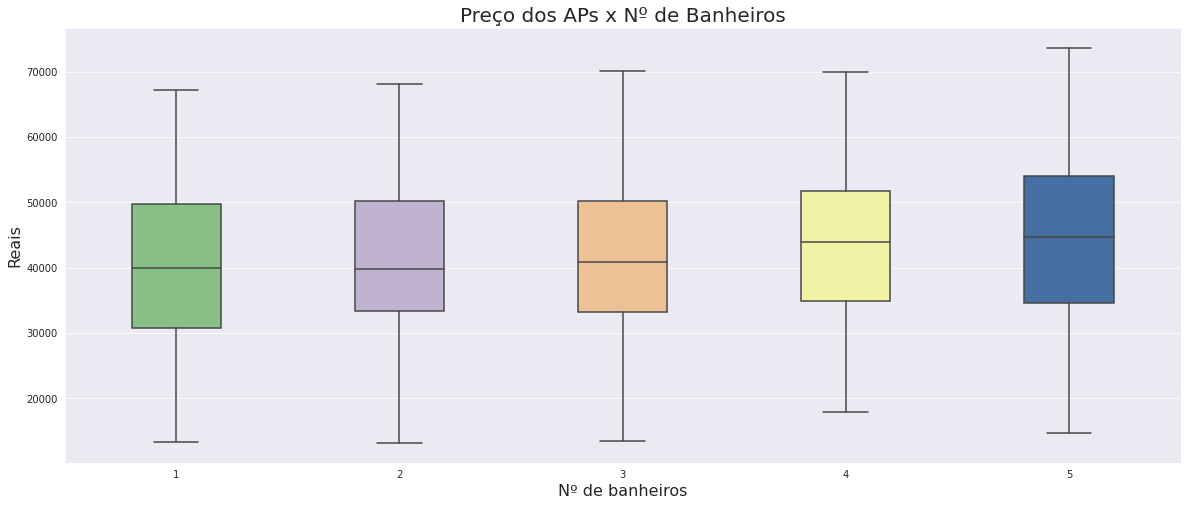

In [62]:
ax=sns.boxplot(x='banheiros',y='precos',data=dados,orient='v',width=0.4)

sns.set_palette("Accent")
ax.figure.set_size_inches(20,8)
ax.set_title('Preço dos APs x Nº de Banheiros',fontsize=20)
ax.set_ylabel('Reais',fontsize=16)
ax.set_xlabel('Nº de banheiros',fontsize=16)

Mais uma vez, não se observa uma diferença muito grande no preço dos imóveis ao compararmos com o número de banheiros!

### Box-plot (Preço X Lareira)

Text(0.5, 0, 'Nº de lareiras')

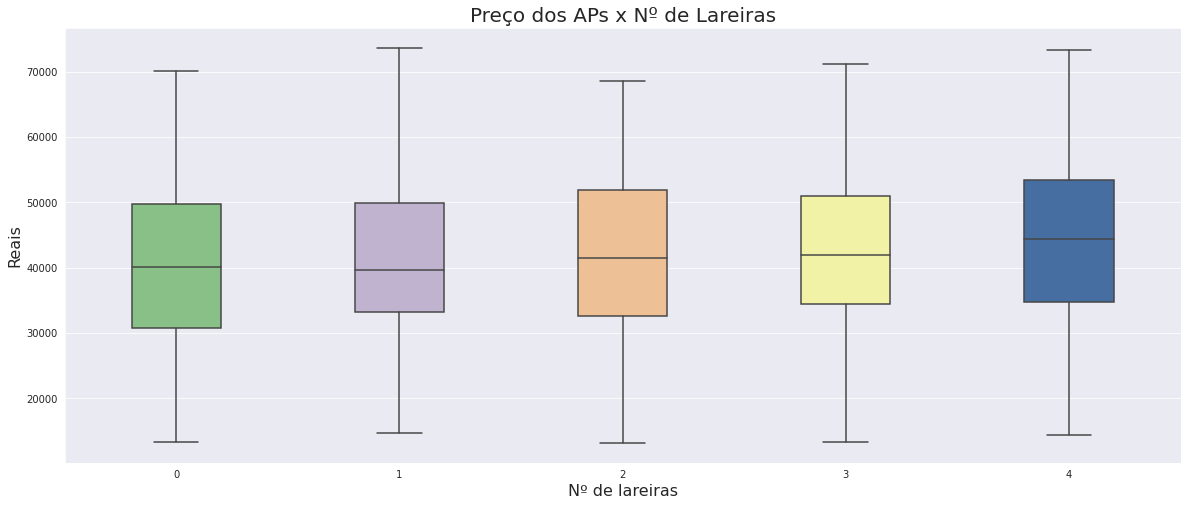

In [63]:
ax=sns.boxplot(x='lareira',y='precos',data=dados,orient='v',width=0.4)

sns.set_palette("Accent")
ax.figure.set_size_inches(20,8)
ax.set_title('Preço dos APs x Nº de Lareiras',fontsize=20)
ax.set_ylabel('Reais',fontsize=16)
ax.set_xlabel('Nº de lareiras',fontsize=16)

Mais uma vez, a correlação não é encontrada

### Box-plot (Preço X Acabamento em Mármore)

<AxesSubplot:title={'center':'Preço dos APs x Possui Marmore'}, xlabel='Possui marmore', ylabel='Reais'>

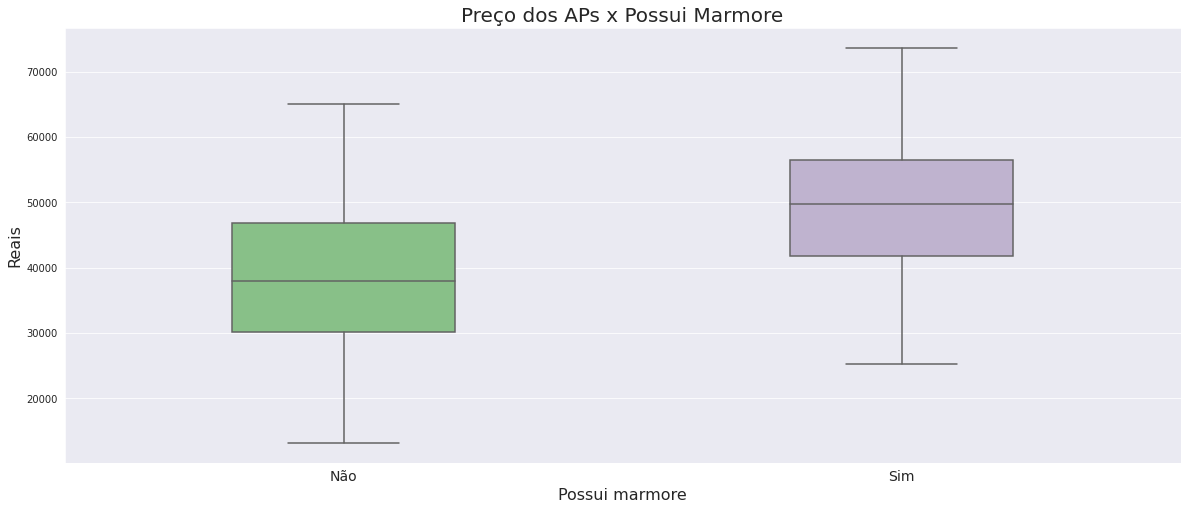

In [71]:
ax=sns.boxplot(x='marmore',y='precos',data=dados,orient='v',width=0.4)

sns.set_palette("Accent")
ax.figure.set_size_inches(20,8)
ax.set_title('Preço dos APs x Possui Marmore',fontsize=20)
ax.set_ylabel('Reais',fontsize=16)
ax.set_xlabel('Possui marmore',fontsize=16)
ax.set_xticklabels(['Não','Sim'],fontsize=14)
ax

Aqui já percebe-se uma correlação mais forte!

### Box-plot (Preço X Andares)

<AxesSubplot:title={'center':'Preço dos APs x Possui mais de um andar'}, xlabel='Possui mais de um andar', ylabel='Reais'>

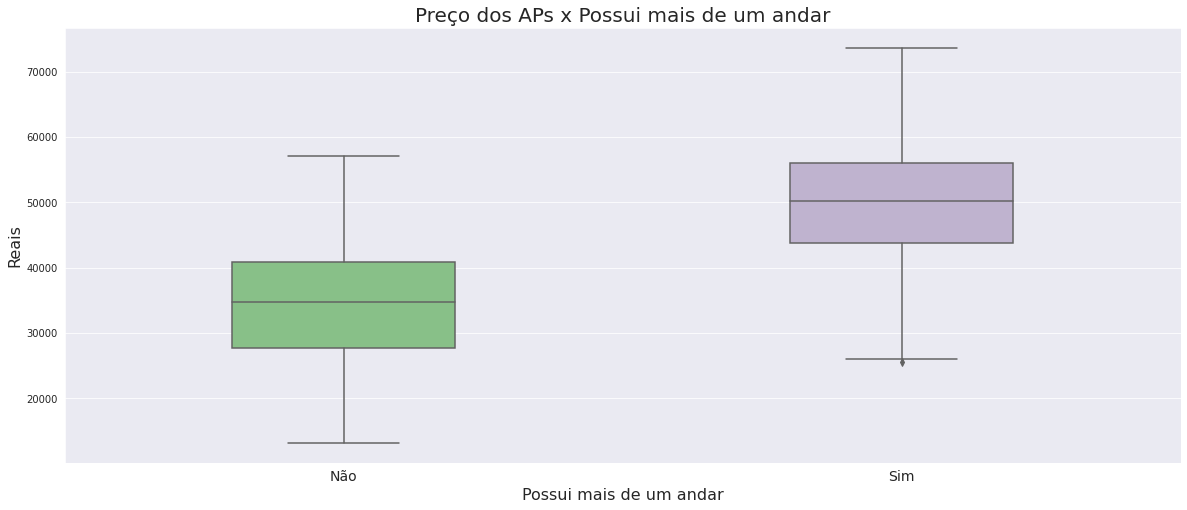

In [72]:
ax=sns.boxplot(x='andares',y='precos',data=dados,orient='v',width=0.4)

sns.set_palette("Accent")
ax.figure.set_size_inches(20,8)
ax.set_title('Preço dos APs x Possui mais de um andar',fontsize=20)
ax.set_ylabel('Reais',fontsize=16)
ax.set_xlabel('Possui mais de um andar',fontsize=16)
ax.set_xticklabels(['Não','Sim'],fontsize=14)
ax

Aqui vemos uma correlação bem forte!

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot:title={'center':'Distribuição dos Preços dos APs'}, xlabel='precos', ylabel='Reais'>

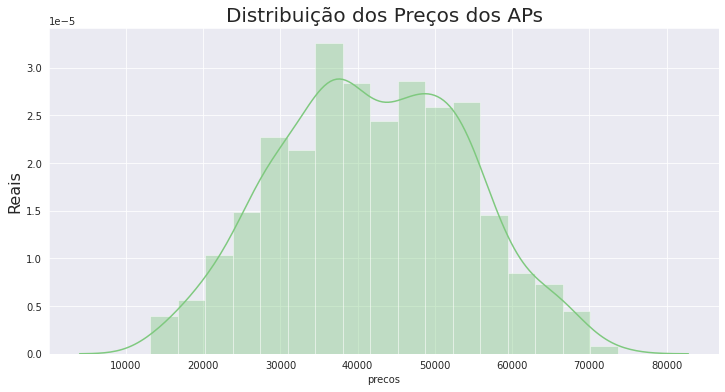

In [76]:
ax=sns.distplot(dados.precos)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição dos Preços dos APs',fontsize=20)
ax.set_ylabel('Reais',fontsize=16)
ax

A variável é relativamente simétrica e segue uma distribuição formal, mas é bom ter testes mais formais

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

Text(0.5, 1.15, 'Dispersão entre as variáveis')

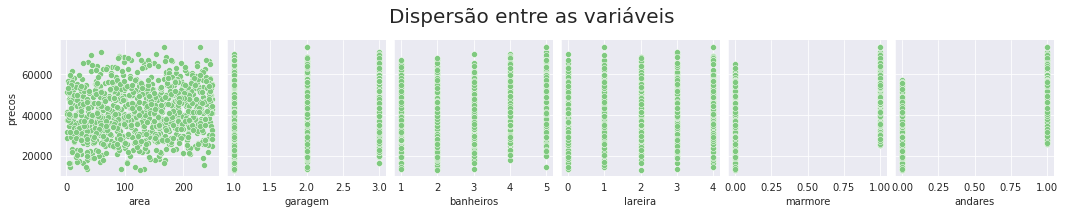

In [78]:
ax=sns.pairplot(dados,y_vars='precos',x_vars=['area','garagem','banheiros','lareira','marmore','andares'])

ax.fig.suptitle('Dispersão entre as variáveis',fontsize=20,y=1.15)

Text(0.5, 1.15, 'Dispersão entre as variáveis')

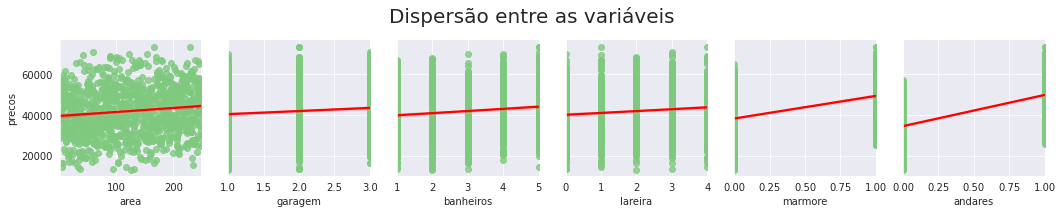

In [80]:
ax=sns.pairplot(dados,y_vars='precos',x_vars=['area','garagem','banheiros','lareira','marmore','andares'],kind='reg',plot_kws={'line_kws':{'color':'red'}})

ax.fig.suptitle('Dispersão entre as variáveis',fontsize=20,y=1.15)

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Já foi feito!

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [84]:
y=dados.precos

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [85]:
X=dados[['area','garagem','banheiros','lareira','marmore','andares']]

## Criando os datasets de treino e de teste

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Já foram importadas!

## Instanciando a classe *LinearRegression()*

In [87]:
modelo=LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [89]:
modelo.fit(X_train,y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [90]:
print('R²= {}'.format(modelo.score(X_train,y_train).round(2)))

R²= 0.64


Não pode-se dizer que o modelo apresenta um bom ajuste, já que ele está bastante longe do R² ideal, que é igual a 1.

O R² determina o quanto a regressão se ajusta aos dados 

Poderíamos ou aumentar o tamanho dos dados ou inserirmos variáveis que tenham uma correlação melhor com a base de dados, por exemplo, a localização do imóvel

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [91]:
y_previsto=modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [92]:
print("R² = {}".format(metrics.r2_score(y_test,y_previsto).round(2)))

R² = 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples


Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [97]:
area=38
garagem=2
banheiros=4
lareira=4
marmore=0
andares=1

entrada =[[area,garagem,banheiros,lareira,marmore,andares]]

print('R$ {0:.2f}'.format(modelo.predict(entrada)[0]))

R$ 46389.80


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo 

In [98]:
EQM=metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM=np.sqrt(EQM).round(2)

R2=metrics.r2_score(y_test,y_previsto).round(2)

pd.DataFrame([EQM,REQM,R2],['EQM','REQM','R²'],columns=['Metricas'])

,Metricas
EQM,50197019.50
REQM,7084.99
R²,0.67


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

Já foi importada!

## Salvando o modelo estimado

In [100]:
output=open('modelo_precos_imoveis','wb')
pickle.dump(modelo,output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```

Foi testado no notebook 'Teste'